In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import iqr

In [2]:
df_Prod = pd.read_csv("Africa Food Production (2004 - 2013).csv")
df_Prod

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111
...,...,...,...,...
23105,Zimbabwe,Crustaceans,2009,0
23106,Zimbabwe,Crustaceans,2010,0
23107,Zimbabwe,Crustaceans,2011,0
23108,Zimbabwe,Crustaceans,2012,0


In [3]:
df_Prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [4]:
format_dict = {'Year':'{:%Y}'}
df_Prod['Year'] = pd.to_datetime(df_Prod['Year'])
df_Prod.head().style.format(format_dict)

,Country,Item,Year,Value
0,Algeria,Wheat and products,1970,2731
1,Algeria,Wheat and products,1970,2415
2,Algeria,Wheat and products,1970,2688
3,Algeria,Wheat and products,1970,2319
4,Algeria,Wheat and products,1970,1111


In [5]:
v1 = df_Prod.groupby(['Country'] ,as_index=False)['Value'].agg(['sum']).reset_index()
v1

,Country,sum
0,Algeria,188650
1,Angola,195499
2,Benin,88072
3,Botswana,4808
4,Burkina Faso,100129
5,Cabo Verde,1658
6,Cameroon,197670
7,Central African Republic,24921
8,Chad,45078
9,Congo,25791


<AxesSubplot:xlabel='Country'>

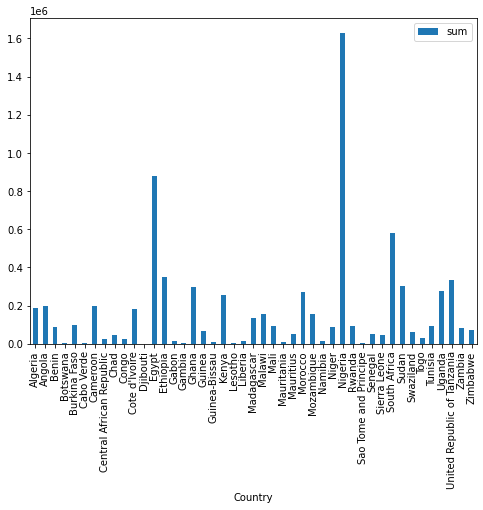

In [6]:
v1.plot(x='Country', y='sum', kind="bar", figsize=[8, 6])

In [7]:
df_Supply = pd.read_csv("Africa Food Supply (2004 - 2013).csv")
df_Supply

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048
...,...,...,...
445,Zimbabwe,2009,2147
446,Zimbabwe,2010,2168
447,Zimbabwe,2011,2200
448,Zimbabwe,2012,2197


In [8]:
df_Supply.info

<bound method DataFrame.info of       Country  Year  Value
0     Algeria  2004   2987
1     Algeria  2005   2958
2     Algeria  2006   3047
3     Algeria  2007   3041
4     Algeria  2008   3048
..        ...   ...    ...
445  Zimbabwe  2009   2147
446  Zimbabwe  2010   2168
447  Zimbabwe  2011   2200
448  Zimbabwe  2012   2197
449  Zimbabwe  2013   2110

[450 rows x 3 columns]>

In [9]:
v2 = df_Supply.groupby(['Country'] ,as_index=False)['Value'].agg(['sum']).reset_index()
v2

,Country,sum
0,Algeria,31118
1,Angola,22556
2,Benin,25378
3,Botswana,22263
4,Burkina Faso,26072
5,Cabo Verde,25514
6,Cameroon,24603
7,Central African Republic,20719
8,Chad,20511
9,Congo,21530


<AxesSubplot:xlabel='Country'>

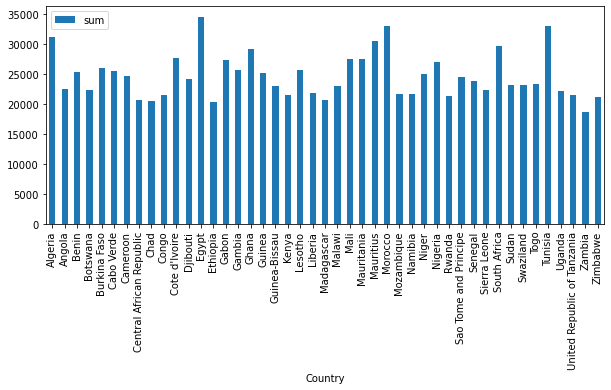

In [10]:
v2.plot(x='Country', y='sum', kind="bar", figsize=[10, 4])

In [11]:
df_Prod['IQR'] = df_Prod['Country'].map(df_Prod.groupby('Country')['Value'].agg(iqr))
df_Prod['IQR']

0        208.75
1        208.75
2        208.75
3        208.75
4        208.75
          ...  
23105     57.00
23106     57.00
23107     57.00
23108     57.00
23109     57.00
Name: IQR, Length: 23110, dtype: float64

In [12]:
df_Supply['IQR'] = df_Supply['Country'].map(df_Supply.groupby('Country')['Value'].agg(iqr))
df_Supply['IQR']

0      155.75
1      155.75
2      155.75
3      155.75
4      155.75
        ...  
445     65.00
446     65.00
447     65.00
448     65.00
449     65.00
Name: IQR, Length: 450, dtype: float64